In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv('Dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     1749 non-null   int64 
 1   News      1749 non-null   object
 2   Category  1749 non-null   object
dtypes: int64(1), object(2)
memory usage: 41.1+ KB


In [ ]:
data.columns= ['index', 'News', 'Category']
data.to_csv('Dataset.csv', index=False)

In [ ]:
data = pd.read_csv('Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     1749 non-null   int64 
 1   News      1749 non-null   object
 2   Category  1749 non-null   object
dtypes: int64(1), object(2)
memory usage: 41.1+ KB


In [ ]:
data.describe()

,index
count,1749.000000
mean,446.183533
std,267.400081
min,0.000000
25%,219.000000
50%,437.000000
75%,656.000000
max,999.000000


In [ ]:
data.head()

,index,News,Category
0,1,Nottingham Forest have confirmed the signing o...,Football
1,2,Mason Greenwood has released a short statement...,Football
2,3,Former Spain international Isco remains on the...,Football
3,4,Mason Greenwood will not return to Manchester ...,Football
4,5,Paris Saint-Germain have confirmed that Kylian...,Football


In [ ]:
data.shape


(1749, 3)

In [ ]:
data = data[data['News'].str.len() >= 5]

In [ ]:
data.shape

(1499, 3)

In [ ]:
data.Category.value_counts()

Cricket     750
Football    749
Name: Category, dtype: int64

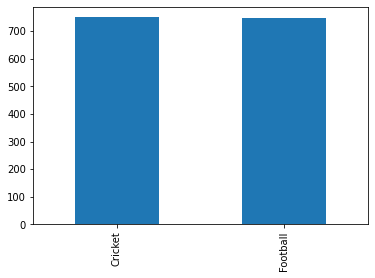

In [ ]:
# plotting the value counts of category
data.Category.value_counts().plot(kind='bar')

In [ ]:
data.isna().value_counts()

index  News   Category
False  False  False       1499
dtype: int64

In [ ]:
data.News.empty

False

In [ ]:
data.shape


(1499, 3)

In [ ]:
for index, row in data.iterrows():
    if not row['News']:
        data.drop(index, inplace=True)


In [ ]:
data.shape

(1499, 3)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
def input_process(text):
    translator = str.maketrans('', '', string.punctuation)
    nopunc = text.translate(translator)
    words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]    #list comprehension method : maxm list operation lai single line of code ma lekhne
    return ' '.join(words)

In [ ]:
def remove_stop_words(input):
    final_input = []
    for line in input:
        line = input_process(line)
        final_input.append(line)
    return final_input

In [ ]:
f_df = pd.DataFrame(columns = ['News', 'Label'])
f_df['News'] = data['News']
f_df['Label'] = data['Category']
input = f_df['News']
output = f_df['Label']
input = remove_stop_words(input)


In [ ]:
f_df['News'] = input
f_df['News']


0       Nottingham Forest confirmed signing free agent...
1       Mason Greenwood released short statement stati...
2       Former Spain international Isco remains hunt n...
3       Mason Greenwood return Manchester United club ...
4       Paris SaintGermain confirmed Kylian Mbappe exp...
                              ...                        
1736    career Shreyas Gopal occupied precarious place...
1739    noticed India played 71 international matches ...
1742    India 234 4 Gill 126 Tripathi 44 Pandya 30 bea...
1745    time 2023 Womens T20 World Cup Yes quite ride ...
1748    Australia India first played Test cricket 1947...
Name: News, Length: 1499, dtype: object

In [ ]:
#removing extra spaces
f_df['News'] = f_df['News'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
#removing numbers
f_df['News'] = f_df['News'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
f_df['News'] = f_df['News'].astype(str)

In [ ]:
f_df.fillna("NaN", inplace=True)

In [ ]:
f_df.describe()

,News,Label
count,1499,1499
unique,1253,2
top,India Gill Tripathi Pandya beat New Zeala...,Cricket
freq,26,750


In [ ]:
#lemmatization
nltk.download('omw-1.4')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
f_df['News'] = f_df['News'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
f_df['Label'] = f_df['Label'].map({'Football': 0, 'Cricket': 1})

In [ ]:
f_df.to_csv('preprocessed_Data.csv', index=False)

In [ ]:
%pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

In [ ]:
dataset = pd.read_csv('preprocessed_Data.csv')

In [ ]:
dataset.shape

(1499, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   News    1499 non-null   object
 1   Label   1499 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 23.5+ KB


In [ ]:
dataset.head()

,News,Label
0,Nottingham Forest confirmed signing free agent...,0
1,Mason Greenwood released short statement stati...,0
2,Former Spain international Isco remains hunt n...,0
3,Mason Greenwood return Manchester United club ...,0
4,Paris SaintGermain confirmed Kylian Mbappe exp...,0


Football


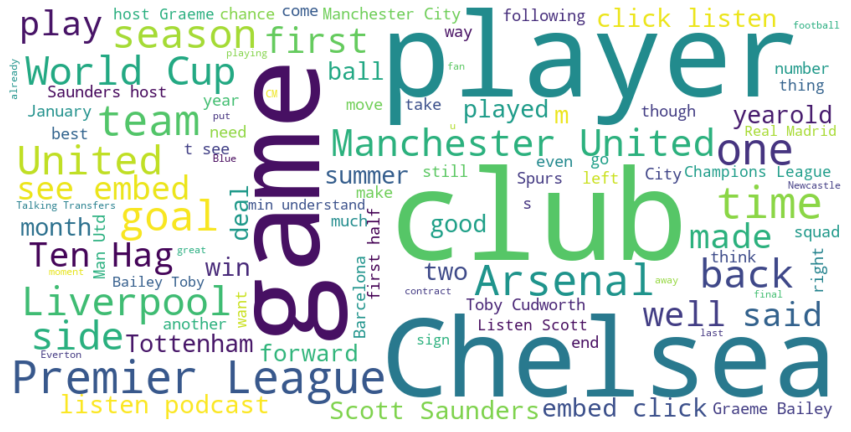

Cricket


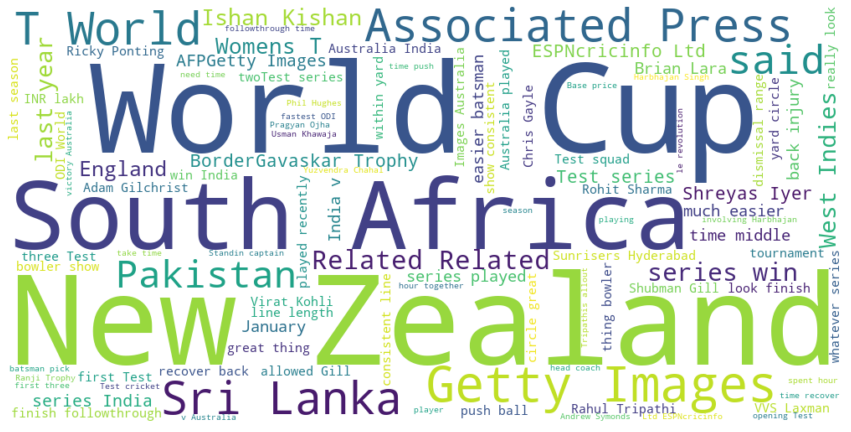

In [ ]:
for i in dataset.Label.unique():
    news = ' '.join(dataset[dataset.Label == i].News.astype(str))
    wordcloud = WordCloud(width=1000, height=500, max_font_size=150, max_words=100, background_color="white").generate(news)
    if i == 0:
      print('Football')
    else:
      print('Cricket')
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer   
import pickle

In [ ]:
def train_model():
  input = dataset['News']
  output = dataset['Label']
  input = vectorizer.fit_transform(input)
  nb = MultinomialNB()
  nb.fit(input, output)
  return nb


In [ ]:
vectorizer = CountVectorizer()
model = train_model()
pickle.dump(model, open('classifier.model','wb'))
pickle.dump(vectorizer, open('vectorizer.pickle', 'wb'))